# Notebook: Comparativo entre Abordagem Evolutiva e Multiobjetivo para Otimização de Prompts

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List


In [15]:
# Caminhos esperados para os diretórios
paths = {
    "multiobj": "~/repos/emo-prompt-project/logs/emo",  
    "evolutiva": "~/repos/emo-prompt-project/logs/evo"  
}


In [16]:
# Função para carregar arquivos CSV

def carregar_dados(diretorio: str, padrao: str = "final_results") -> List[pd.DataFrame]:
    diretorio = os.path.expanduser(diretorio)  # Resolve o "~" para o caminho completo
    arquivos = [f for f in os.listdir(diretorio) if f.startswith(padrao) and f.endswith(".csv")]
    dataframes = []
    for arquivo in arquivos:
        df = pd.read_csv(os.path.join(diretorio, arquivo))
        df["arquivo"] = arquivo
        dataframes.append(df)
    return dataframes



In [17]:
# Carregar dados - 
df_multiobj = carregar_dados(paths["multiobj"])
df_evolutiva = carregar_dados(paths["evolutiva"])

In [21]:
# Placeholder para análise estatística agregada
def analisar_estatisticas(lista_dfs: List[pd.DataFrame], nome_abordagem: str):
    print(f"\n===== Estatísticas: {nome_abordagem} =====")
    for df in lista_dfs:
        print(f"\nArquivo: {df['arquivo'].iloc[0]}")
        print(df.describe())

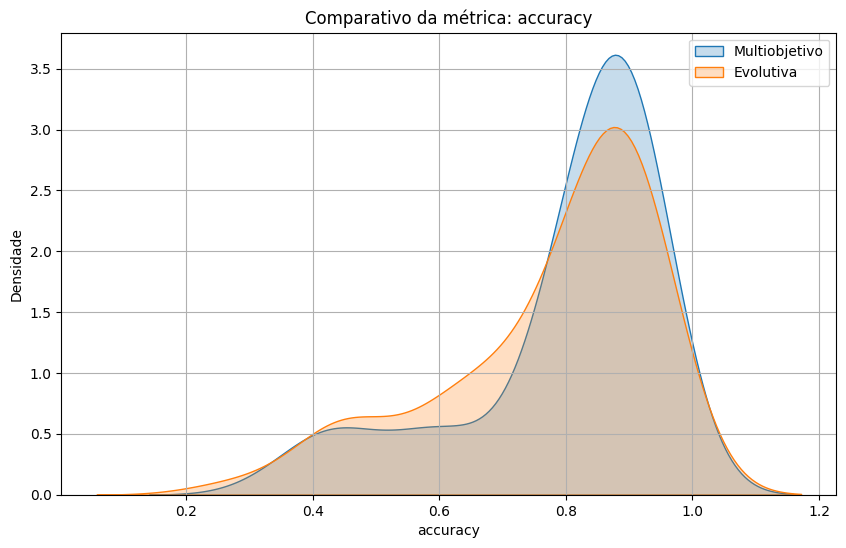

In [25]:
# Placeholder para geração de gráficos

def plot_comparativo(metric: str, df1: pd.DataFrame, df2: pd.DataFrame, label1: str, label2: str):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df1[metric], label=label1, fill=True)
    sns.kdeplot(df2[metric], label=label2, fill=True)
    plt.title(f"Comparativo da métrica: {metric}")
    plt.xlabel(metric)
    plt.ylabel("Densidade")
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_comparativo("accuracy", df_multiobj[0], df_evolutiva[0], "Multiobjetivo", "Evolutiva")

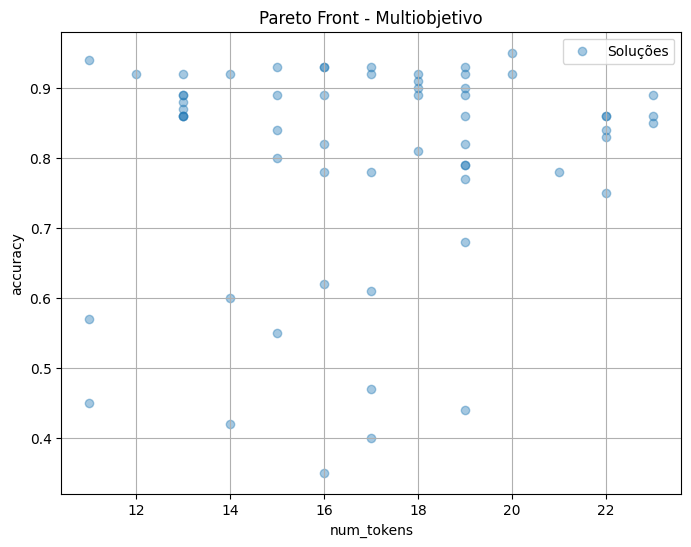

In [26]:
# Geração de Frente de Pareto para multiobjetivo
def plot_pareto_front(df: pd.DataFrame, x_col: str, y_col: str, titulo: str):
    plt.figure(figsize=(8, 6))
    pareto_df = df.sort_values(by=[x_col])
    pareto_front = [pareto_df.iloc[0]]
    for _, row in pareto_df.iterrows():
        if row[y_col] >= pareto_front[-1][y_col]:
            pareto_front.append(row)
    pareto_front = pd.DataFrame(pareto_front)
    
    plt.scatter(df[x_col], df[y_col], label='Soluções', alpha=0.4)
    #plt.plot(pareto_front[x_col], pareto_front[y_col], color='red', linewidth=2, label='Fronte de Pareto')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_pareto_front(df_multiobj[0], x_col="num_tokens", y_col="accuracy", titulo="Pareto Front - Multiobjetivo")

